<a href="https://colab.research.google.com/github/zuzanadostalova/Store_sales/blob/main/Store_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json 
import os
from pathlib import Path

# your api key
api_key = {"username":"","key":""}

# uses pathlib Path
kaggle_path = Path('/root/.kaggle')
os.makedirs(kaggle_path, exist_ok=True)

# opens file and dumps python dict to json object 
with open (kaggle_path/'kaggle.json', 'w') as handl:
    json.dump(api_key,handl)

os.chmod(kaggle_path/'kaggle.json', 600)  

In [2]:
! kaggle competitions download -c store-sales-time-series-forecasting -p /content/drive/MyDrive

401 - Unauthorized


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool


In [4]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/store-sales-time-series-forecasting.zip", 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting')

In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/train.csv')
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [7]:
data.corr()

,id,store_nbr,sales,onpromotion
id,1.000000,0.000301,0.085784,0.206260
store_nbr,0.000301,1.000000,0.041196,0.007286
sales,0.085784,0.041196,1.000000,0.427923
onpromotion,0.206260,0.007286,0.427923,1.000000


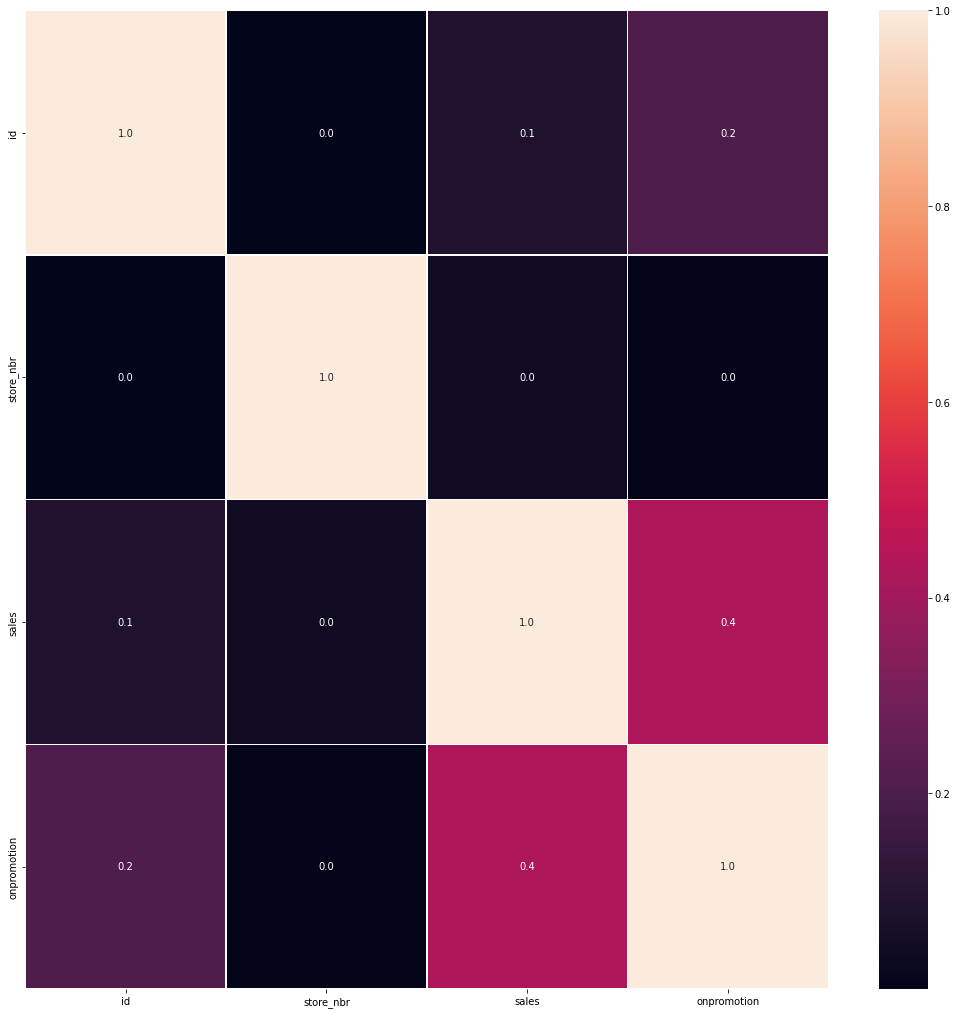

In [8]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [9]:
data.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0
6,6,2013-01-01,1,CELEBRATION,0.0,0
7,7,2013-01-01,1,CLEANING,0.0,0
8,8,2013-01-01,1,DAIRY,0.0,0
9,9,2013-01-01,1,DELI,0.0,0


In [10]:
data.columns


Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

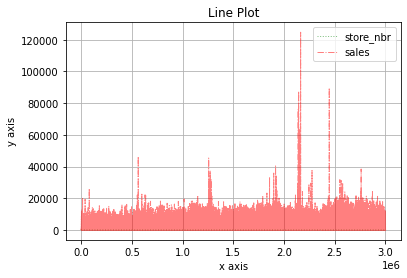

In [11]:
# Line Plot
# color = color, label = label, linewidth = width of line, alpha = opacity, grid = grid, linestyle = sytle of line
data.store_nbr.plot(kind = 'line', color = 'g',label = 'store_nbr',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
data.sales.plot(color = 'r',label = 'sales',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')     # legend = puts label into plot
plt.xlabel('x axis')              # label = name of label
plt.ylabel('y axis')
plt.title('Line Plot')            # title = title of plot
plt.show()

Text(0.5, 1.0, 'store_nbr sales Scatter Plot')

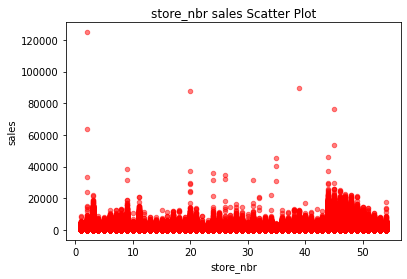

In [12]:
# Scatter Plot 
# x = attack, y = defense
data.plot(kind='scatter', x='store_nbr', y='sales',alpha = 0.5,color = 'red')
plt.xlabel('store_nbr')              # label = name of label
plt.ylabel('sales')
plt.title('store_nbr sales Scatter Plot')            # title = title of plot

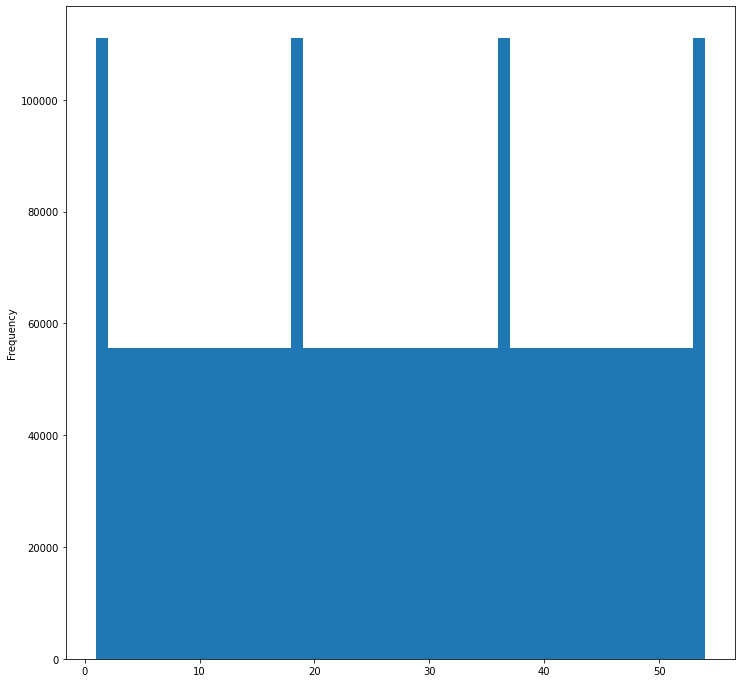

In [13]:
# Histogram
# bins = number of bar in figure
data.store_nbr.plot(kind = 'hist',bins = 50,figsize = (12,12))
plt.show()

In [14]:
# clf() = cleans it up again you can start a fresh
data.store_nbr.plot(kind = 'hist',bins = 50)
plt.clf()
# We cannot see plot due to clf()

<Figure size 432x288 with 0 Axes>

In [15]:
#create dictionary and look its keys and values
dictionary = {'spain' : 'madrid','usa' : 'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [16]:
# Keys have to be immutable objects like string, boolean, float, integer or tubles
# List is not immutable
# Keys are unique
dictionary['spain'] = "barcelona"    # update existing entry
print(dictionary)
dictionary['france'] = "paris"    

# Add new entry
print(dictionary)
del dictionary['spain']              # remove entry with key 'spain'
print(dictionary)
print('france' in dictionary)        # check include or not
dictionary.clear()                   # remove all entries in dict
print(dictionary)


{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


In [17]:
# In order to run all code you need to take comment this line
#del dictionary         # delete entire dictionary     
print(dictionary)       # it gives error because dictionary is deleted

{}


PANDAS

In [18]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/store-sales-time-series-forecasting/stores.csv')
data.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [19]:
series = data['city']        # data['Defense'] = series
print(type(series))
data_frame = data[['city']]  # data[['Defense']] = data frame
print(type(data_frame))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [20]:
# Comparison operator
print(3 > 2)
print(3!=2)
# Boolean operators
print(True and False)
print(True or False)

True
True
False
True


In [21]:
# 1 - Filtering Pandas data frame
x = data['cluster']>10     # There are only 19 items who have higher cluster value than 10
data[x]

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
5,6,Quito,Pichincha,D,13
9,10,Quito,Pichincha,C,15
11,12,Latacunga,Cotopaxi,C,15
12,13,Latacunga,Cotopaxi,C,15
14,15,Ibarra,Imbabura,C,15
16,17,Quito,Pichincha,C,12
17,18,Quito,Pichincha,B,16
18,19,Guaranda,Bolivar,C,15


In [22]:
# 2 - Filtering pandas with logical_and
# There are only 9 items who have higher cluster value than 10 and higher store_nbr value than 20
data[np.logical_and(data['cluster']>10, data['store_nbr']>20 )]

,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13


In [23]:
# This is also same with previous code line. Therefore we can also use '&' for filtering.
data[(data['cluster']>10) & (data['store_nbr']>20)]

,store_nbr,city,state,type,cluster
44,45,Quito,Pichincha,A,11
45,46,Quito,Pichincha,A,14
46,47,Quito,Pichincha,A,14
47,48,Quito,Pichincha,A,14
48,49,Quito,Pichincha,A,11
49,50,Ambato,Tungurahua,A,14
50,51,Guayaquil,Guayas,A,17
51,52,Manta,Manabi,A,11
52,53,Manta,Manabi,D,13


In [24]:
# Stay in loop if condition( i is not equal 5) is true
i = 0
while i != 5 :
    print('i is: ',i)
    i +=1
print(i,' is equal to 5')

i is:  0
i is:  1
i is:  2
i is:  3
i is:  4
5  is equal to 5


In [25]:
# Stay in loop if condition( i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is: ',i)
print('')

# Enumerate index and value of list
# index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index," : ",value)
print('')   

# For dictionaries
# We can use for loop to achive key and value of dictionary. We learnt key and value at dictionary part.
dictionary = {'spain':'madrid','france':'paris'}
for key,value in dictionary.items():
    print(key," : ",value)
print('')

# For pandas we can achieve index and value
for index,value in data[['cluster']][0:1].iterrows():
    print(index," : ",value)

i is:  1
i is:  2
i is:  3
i is:  4
i is:  5

0  :  1
1  :  2
2  :  3
3  :  4
4  :  5

spain  :  madrid
france  :  paris

0  :  cluster    13
Name: 0, dtype: int64


2. PYTHON DATA SCIENCE TOOLBOX

In [26]:
# example of what we learn above
def tuple_ex():
    """ return defined t tuple"""
    t = (1,2,3)
    return t
a,b,c = tuple_ex()
print(a,b,c)

1 2 3


SCOPE

In [27]:
# guess prints what
x = 2
def f():
    x = 3
    return x
print(x)      # x = 2 global scope
print(f())    # x = 3 local scope

2
3


In [28]:
# What if there is no local scope
x = 5
def f():
    y = 2*x        # there is no local scope x
    return y
print(f())         # it uses global scope x  
# First local scope searched, then global scope searched, if two of them cannot be found lastly built in scope searched.

10


In [ ]:
# How can we learn what is built in scope
import builtins
dir(builtins)

NESTED FUNCTION

In [30]:
#nested function
def square():
    """ return square of value """
    def add():
        """ add two local variable """
        x = 2
        y = 3
        z = x + y
        return z
    return add()**2
print(square()) 

25


DEFAULT and FLEXIBLE ARGUMENTS

In [31]:
# default arguments
def f(a, b = 1, c = 2):
    y = a + b + c
    return y
print(f(5))
# what if we want to change default arguments
print(f(5,4,3))

8
12


In [32]:
# flexible arguments *args
def f(*args):
    for i in args:
        print(i)
f(1)
print("")
f(1,2,3,4)
# flexible arguments **kwargs that is dictionary
def f(**kwargs):
    """ print key and value of dictionary"""
    for key, value in kwargs.items():               # If you do not understand this part turn for loop part and look at dictionary in for loop
        print(key, " ", value)
f(country = 'spain', capital = 'madrid', population = 123456)

1

1
2
3
4
country   spain
capital   madrid
population   123456



LAMBDA FUNCTION

In [33]:
# lambda function
square = lambda x: x**2     # where x is name of argument
print(square(4))
tot = lambda x,y,z: x+y+z   # where x,y,z are names of arguments
print(tot(1,2,3))

16
6


ANONYMOUS FUNCTİON
Like lambda function but it can take more than one arguments.

map(func,seq) : applies a function to all the items in a list

In [34]:
number_list = [1,2,3]
y = map(lambda x:x**2,number_list)
print(list(y))

[1, 4, 9]



ITERATORS
iterable is an object that can return an iterator
iterable: an object with an associated iter() method
example: list, strings and dictionaries
iterator: produces next value with next() method

In [35]:
# iteration example
name = "ronaldo"
it = iter(name)
print(next(it))    # print next iteration
print(*it)   # print remaining iteration

r
o n a l d o


In [36]:
# zip example
list1 = [1,2,3,4]
list2 = [5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]
